<a href="https://colab.research.google.com/github/trunghq0205/projects/blob/main/Thesis/Moirai_base_model_fine_tune_with_Covariates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Fine-tune MOIRAI-BASE model with Covariates**

- **Paper:** https://arxiv.org/pdf/2402.02592
- **Github responsibilty:** https://github.com/SalesforceAIResearch/uni2ts

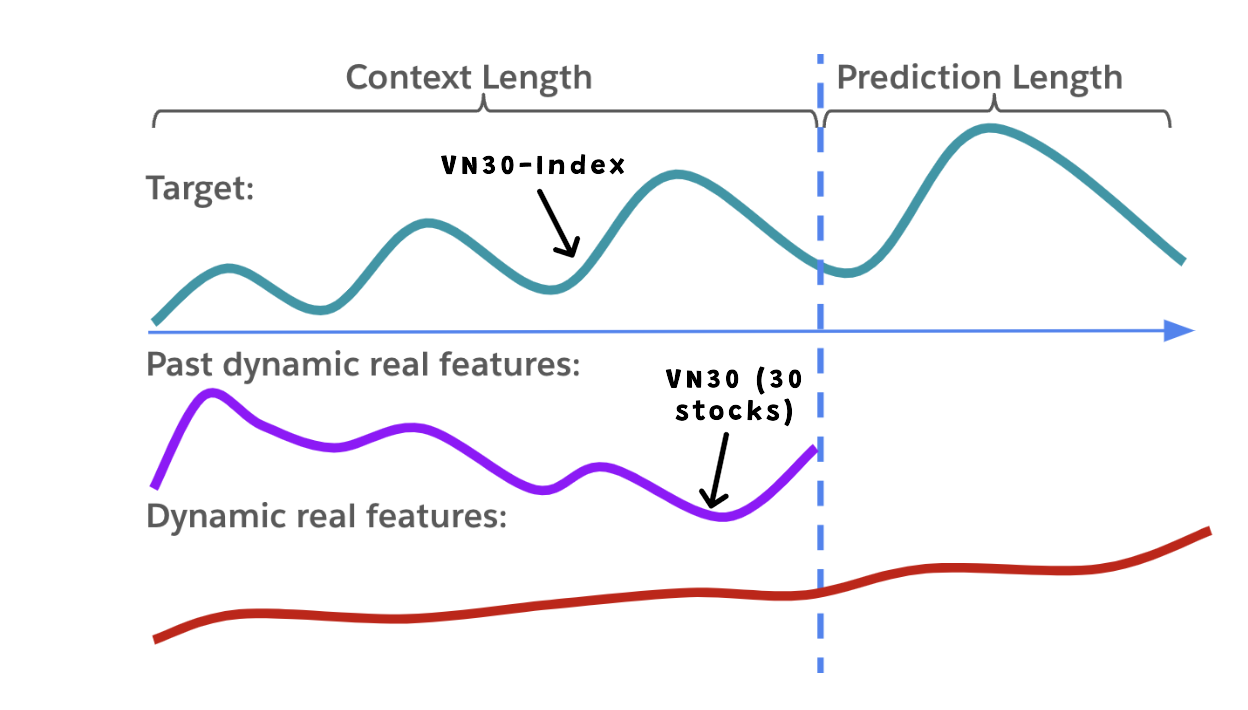

- Mục tiêu cần dự báo là chỉ số VN30-Index, bị ảnh hưởng trực tiếp bởi 30 mã cổ phiếu VN30.
- Mô hình học cách dự báo chỉ số VN30-Index, sử dụng `Past dynamic real features` là giá của 30 cổ phiếu VN30 trong quá khứ làm `features`, tổng quát gọi là `covariates`.
- Trong đó, `covariates` (còn gọi là biến đồng thời hay biến dự báo ngoài) là các biến độc lập có thể ảnh hưởng đến giá trị của chuỗi thời gian đang cần dự báo.

## **Install**

In [ ]:
!gdown 1KawsXQNvBB9F7onqFaAMShX1FH9fnR6U
!unzip ./uni2ts.zip

Downloading...
From (original): https://drive.google.com/uc?id=1KawsXQNvBB9F7onqFaAMShX1FH9fnR6U
From (redirected): https://drive.google.com/uc?id=1KawsXQNvBB9F7onqFaAMShX1FH9fnR6U&confirm=t&uuid=fe8a704b-d60b-49f9-bddd-12c5447ede98
To: /content/uni2ts.zip
100% 342M/342M [00:05<00:00, 65.2MB/s]
Archive:  ./uni2ts.zip
   creating: uni2ts/
   creating: uni2ts/.git/
   creating: uni2ts/.github/
   creating: uni2ts/cli/
   creating: uni2ts/dataset/
   creating: uni2ts/example/
   creating: uni2ts/finetune/
   creating: uni2ts/outputs/
   creating: uni2ts/project/
   creating: uni2ts/src/
   creating: uni2ts/test/
  inflating: uni2ts/CODEOWNERS       
  inflating: uni2ts/forecast.pkl     
  inflating: uni2ts/CODE_OF_CONDUCT.md  
  inflating: uni2ts/SECURITY.md      
  inflating: uni2ts/CITATION.cff     
  inflating: uni2ts/CONTRIBUTING.md  
  inflating: uni2ts/.pre-commit-config.yaml  
  inflating: uni2ts/pyproject.toml   
  inflating: uni2ts/README.md        
  inflating: uni2ts/.gitignore

In [ ]:
cd uni2ts

/content/uni2ts


In [ ]:
!pip install -e '.[notebook]'

Obtaining file:///content/uni2ts
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-

In [ ]:
pwd

'/content'

In [ ]:
cd uni2ts

/content/uni2ts


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


import numpy as np
import pickle
import gdown
import datasets

## **Load Dataset**

- Tập `vn30data.csv`: Bao gồm 991 ngày giao dịch từ ngày `2020-01-01` đến ngày `2024-01-01`, trong đó 30 cột đầu chứa dữ liệu VN30 và cột cuối cùng chứa dữ liệu VN30-Index. Tập dữ liệu đã được xử lý trước để phù hợp với mô hình.

- Tập `vn30test.csv`: Bao gồm 91 ngày giao dịch từ ngày `2024-01-02` đến ngày `2024-05-20`. Cấu trúc tương tự như `vn30data.csv`. Tập dữ liệu đã được xử lý trước để phù hợp với mô hình.

In [ ]:
file_id = '1dbvdFUkc7vQy7uRBVh28gTnoYDLv0seK'
output_folder = "./dataset/VN30/vn30data.csv"

gdown.download(id=file_id, output=output_folder)

Downloading...
From: https://drive.google.com/uc?id=1dbvdFUkc7vQy7uRBVh28gTnoYDLv0seK
To: /content/uni2ts/dataset/VN30/vn30data.csv
100%|██████████| 189k/189k [00:00<00:00, 49.9MB/s]


'./dataset/VN30/vn30data.csv'

In [ ]:
file_id = '1EIX5BgsrnaLxC-rBw_o5YcgaYfUhHiZH'
output_folder = "./dataset/VN30/vn30test.csv"

gdown.download(id=file_id, output=output_folder)

Downloading...
From: https://drive.google.com/uc?id=1EIX5BgsrnaLxC-rBw_o5YcgaYfUhHiZH
To: /content/uni2ts/dataset/VN30/vn30test.csv
100%|██████████| 16.3k/16.3k [00:00<00:00, 34.7MB/s]


'./dataset/VN30/vn30test.csv'

In [ ]:
train_df = pd.read_csv('./dataset/VN30/vn30data.csv', index_col=0, parse_dates=True)
print(train_df.shape)
train_df

(991, 31)


,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE,VN30
time,,,,,,,,,,,,,,,,,,,,,
2020-01-02,9.46,32.369,61.39,14.35,28.95,68.44,10.15,8.91,9.94,18.61,...,23.08,8.37,59.07,62.60,102.210,148.0,81.40,6.88,34.35,886.88
2020-01-03,9.46,32.229,61.04,14.22,28.46,68.59,10.50,8.83,10.00,18.54,...,22.94,8.45,58.48,62.82,102.477,148.0,81.66,6.84,34.60,883.28
2020-01-04,9.26,31.610,60.15,14.25,28.16,70.76,10.32,8.65,9.94,18.61,...,22.35,8.31,56.92,61.50,101.766,146.0,81.04,6.67,33.65,872.34
2020-01-05,9.26,32.229,60.06,14.49,28.70,70.25,10.05,8.56,9.81,18.46,...,22.50,8.33,57.11,61.79,101.943,145.9,81.80,6.82,33.95,876.70
2020-01-06,9.09,32.509,58.72,14.45,28.06,70.18,9.70,8.56,9.71,17.90,...,22.06,8.21,56.59,60.83,101.588,144.8,82.00,6.73,32.70,865.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-14,23.20,41.500,39.50,26.70,96.20,76.00,20.20,19.00,24.36,30.35,...,29.68,16.95,82.20,39.90,43.700,103.0,66.74,17.76,22.55,1097.45
2022-09-15,23.35,41.000,39.05,26.05,94.00,75.50,20.30,18.40,24.18,30.30,...,29.14,16.90,81.50,39.90,43.200,105.0,65.66,17.47,22.60,1111.86
2022-09-16,23.25,41.200,39.20,26.50,94.60,75.00,20.25,18.95,24.73,30.10,...,29.68,17.00,81.20,39.50,43.200,104.3,65.66,17.38,22.70,1115.52


In [ ]:
test_df = pd.read_csv('./dataset/VN30/vn30test.csv', index_col=0, parse_dates=True)
print(test_df.shape)
test_df.head()

(91, 31)


,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE,VN30
2024-01-02,24.45,43.00,39.6,27.20,95.9,75.6,20.95,19.90,24.95,30.85,...,31.13,17.30,83.5,43.00,44.00,107.0,67.43,17.90,23.10,1131.64
2024-01-03,25.00,43.80,39.8,27.60,96.3,76.0,21.60,20.00,25.27,30.80,...,31.62,17.45,84.5,43.40,44.15,107.7,68.12,18.14,23.25,1144.85
2024-01-04,25.30,43.65,40.1,28.60,97.2,76.7,21.40,20.40,25.23,30.95,...,32.10,17.90,85.9,43.45,44.15,107.8,68.12,18.37,23.40,1156.37
2024-01-05,25.45,44.50,40.0,29.00,97.4,77.2,21.80,20.50,25.27,31.00,...,32.20,18.00,86.2,43.10,44.10,107.6,67.92,18.23,23.35,1161.14
2024-01-06,25.35,46.40,40.0,29.55,97.3,76.8,21.50,20.55,25.32,31.20,...,33.07,17.95,86.8,43.35,44.35,106.6,67.33,18.28,23.70,1163.52


**Scale data: StandardScaler**

In [ ]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(train_df.values)
scaled_df = pd.DataFrame(scaled_data, columns=train_df.columns, index = train_df.index)

scaled_df.to_csv('./dataset/VN30/vn30data_scaled.csv')

In [ ]:
test_df = pd.read_csv('./dataset/VN30/vn30test.csv', index_col=0, parse_dates=True)

test_scaled = scaler.transform(test_df.values)
test_scaled_test = pd.DataFrame(test_scaled, columns=test_df.columns, index = test_df.index)

test_scaled_test.to_csv('./dataset/VN30/vn30test_scaled.csv')

In [ ]:
train_df_scaled = pd.read_csv('./dataset/VN30/vn30data_scaled.csv', index_col = 0)
print(train_df_scaled.shape)
train_df_scaled.head()

(991, 31)


,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE,VN30
time,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-1.853310,-0.127548,2.314441,-1.885048,-1.409401,-0.412417,-1.304944,-1.507315,-1.469254,-1.091232,...,-0.937741,-1.407086,-0.722994,0.069567,1.229821,2.360959,0.682069,-1.705337,1.770614,-1.088855
2020-01-03,-1.853310,-0.154951,2.252568,-1.909568,-1.433132,-0.401462,-1.264049,-1.528552,-1.462017,-1.099803,...,-0.950685,-1.391642,-0.775482,0.087233,1.243284,2.360959,0.712668,-1.712828,1.849776,-1.103539
2020-01-04,-1.895167,-0.276115,2.095234,-1.903909,-1.447661,-0.242969,-1.285081,-1.576337,-1.469254,-1.091232,...,-1.005235,-1.418668,-0.914266,-0.018763,1.207434,2.214174,0.639702,-1.744661,1.548960,-1.148161
2020-01-05,-1.895167,-0.154951,2.079324,-1.858643,-1.421509,-0.280218,-1.316629,-1.600229,-1.484933,-1.109598,...,-0.991366,-1.414807,-0.897363,0.004524,1.216359,2.206835,0.729144,-1.716573,1.643954,-1.130377
2020-01-06,-1.930745,-0.100144,1.842439,-1.866187,-1.452504,-0.285331,-1.357524,-1.600229,-1.496995,-1.178165,...,-1.032048,-1.437973,-0.943624,-0.072564,1.198459,2.126103,0.752682,-1.733426,1.248143,-1.177366


In [ ]:
test_df_scaled = pd.read_csv('./dataset/VN30/vn30test_scaled.csv', index_col = 0)
print(test_df_scaled.shape)
test_df_scaled.head()

(91, 31)


,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE,VN30
2024-01-02,1.283865,1.953379,-1.537589,0.538611,1.832998,0.110536,-0.043038,1.410186,0.341129,0.407443,...,-0.193457,0.316789,1.450390,-1.504315,-1.705223,-0.648125,-0.962019,0.358210,-1.791685,-0.090518
2024-01-03,1.398971,2.109972,-1.502233,0.614056,1.852370,0.139751,0.032910,1.436732,0.379725,0.401321,...,-0.148153,0.345745,1.539354,-1.472195,-1.697660,-0.596750,-0.880815,0.403151,-1.744187,-0.036637
2024-01-04,1.461756,2.080611,-1.449199,0.802668,1.895957,0.190878,0.009541,1.542920,0.374900,0.419687,...,-0.103773,0.432615,1.663903,-1.468180,-1.697660,-0.589411,-0.880815,0.446220,-1.696690,0.010351
2024-01-05,1.493149,2.246991,-1.466877,0.878112,1.905643,0.227397,0.056279,1.569467,0.379725,0.425809,...,-0.094528,0.451919,1.690592,-1.496285,-1.700181,-0.604089,-0.904353,0.420004,-1.712522,0.029807
2024-01-06,1.472221,2.618900,-1.466877,0.981849,1.900800,0.198182,0.021226,1.582740,0.385755,0.450298,...,-0.014089,0.442267,1.743970,-1.476210,-1.687575,-0.677482,-0.973788,0.429367,-1.601695,0.039515


## **Train, validation & test dataset**

In [ ]:
%env CUSTOM_DATA_PATH=./finetune

env: CUSTOM_DATA_PATH=./finetune


Dữ liệu cho tập `train` và `validation`, trong đó 900 ngày giao dịch đầu tiên sẽ nằm trong tập `train` và 91 ngày giao dịch cuối cùng là `validation`

In [ ]:
!python -m uni2ts.data.builder.simple VN30 dataset/VN30/vn30data_scaled.csv --dataset_type wide_multivariate --offset 900

/content/uni2ts/src/uni2ts/common/env.py:43: UserWarning: Failed to load .env file.
  warnings.warn("Failed to load .env file.")
Generating train split: 1 examples [00:00,  7.61 examples/s]
Saving the dataset (1/1 shards): 100% 1/1 [00:00<00:00, 133.39 examples/s]
Generating train split: 1 examples [00:00,  9.03 examples/s]
Saving the dataset (1/1 shards): 100% 1/1 [00:00<00:00, 186.70 examples/s]


Dữ liệu cho tập `test`:

In [ ]:
!python -m uni2ts.data.builder.simple VN30_test dataset/VN30/vn30test_scaled.csv --dataset_type wide_multivariate

/content/uni2ts/src/uni2ts/common/env.py:43: UserWarning: Failed to load .env file.
  warnings.warn("Failed to load .env file.")
Generating train split: 1 examples [00:00, 18.14 examples/s]
Saving the dataset (1/1 shards): 100% 1/1 [00:00<00:00, 130.49 examples/s]


Dữ liệu `train`, `validation` và `test` sau khi hoàn thành sẽ nằm ở thư mục `./finetune`

In [ ]:
ds_multi = datasets.load_from_disk("./finetune/VN30").with_format("numpy")
print(ds_multi[0]["target"].shape)
print(ds_multi[0]["past_feat_dynamic_real"].shape)

(1, 900)
(30, 900)


In [ ]:
ds_multi = datasets.load_from_disk("./finetune/VN30_eval").with_format("numpy")
print(ds_multi[0]["target"].shape)
print(ds_multi[0]["past_feat_dynamic_real"].shape)

(1, 991)
(30, 991)


In [ ]:
ds_multi = datasets.load_from_disk("./finetune/VN30_test").with_format("numpy")
print(ds_multi[0]["target"].shape)
print(ds_multi[0]["past_feat_dynamic_real"].shape)

(1, 91)
(30, 91)


## **Model arguments**

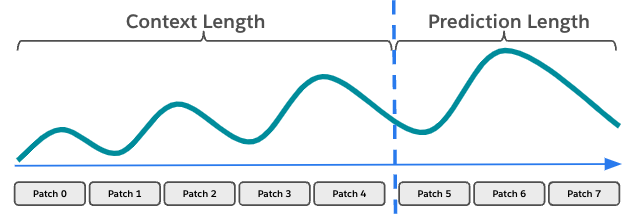

- Với một chuỗi thời gian cần dự báo, Morai sẽ sử dụng một "context window" làm đầu vào và theo đó đầu ra sẽ là một "Prediction window". Do đó, cần xác định 2 tham số:
  - `context_length`: Xác định bao nhiêu time step sẽ được dùng để làm context window
  - `prediction_length`: Xác định bao nhiêu time step sẽ được dùng để làm prediction window (Bao nhiêu time step cần phải dự báo)

- Đối với dữ liệu chuỗi thời gian, thông tin chứa trong một dấu thời gian đơn lẻ là không đủ phong phú. Do đó, tác giả gọi các điểm thời gian liên tiếp nhau là "patches", làm cơ sở để hình thành nên các đơn vị đầu vào cho Moirai (khái niệm này tương tự như word token trong các Language Model). Moirai cung cấp các kích thước `patch_size` khác nhau như sau:
  - `pacth_size`: [8, 16, 32, 64, 128].

- Morai được pre-train với 3 kích thước ('small', 'base', 'large'), cùng với `batch_size`, điều này xác định số lượng mẫu có thể được suy luận song song.
  - Small model: 14M tham số, 6 layers, d_model = 384
  - Base model: 91M tham số, 12 layes, d_model = 768
  - Large model: 311M tham số, 24 layes, d_model = 1024

- Moirai hỗ trợ dự báo xác suất, cần phải chỉ định `num_samples` là số lần nó phải lấy mẫu từ phân phối được dự báo. Mặc định `num_samples = 100`

## **Rolling Evaluation**

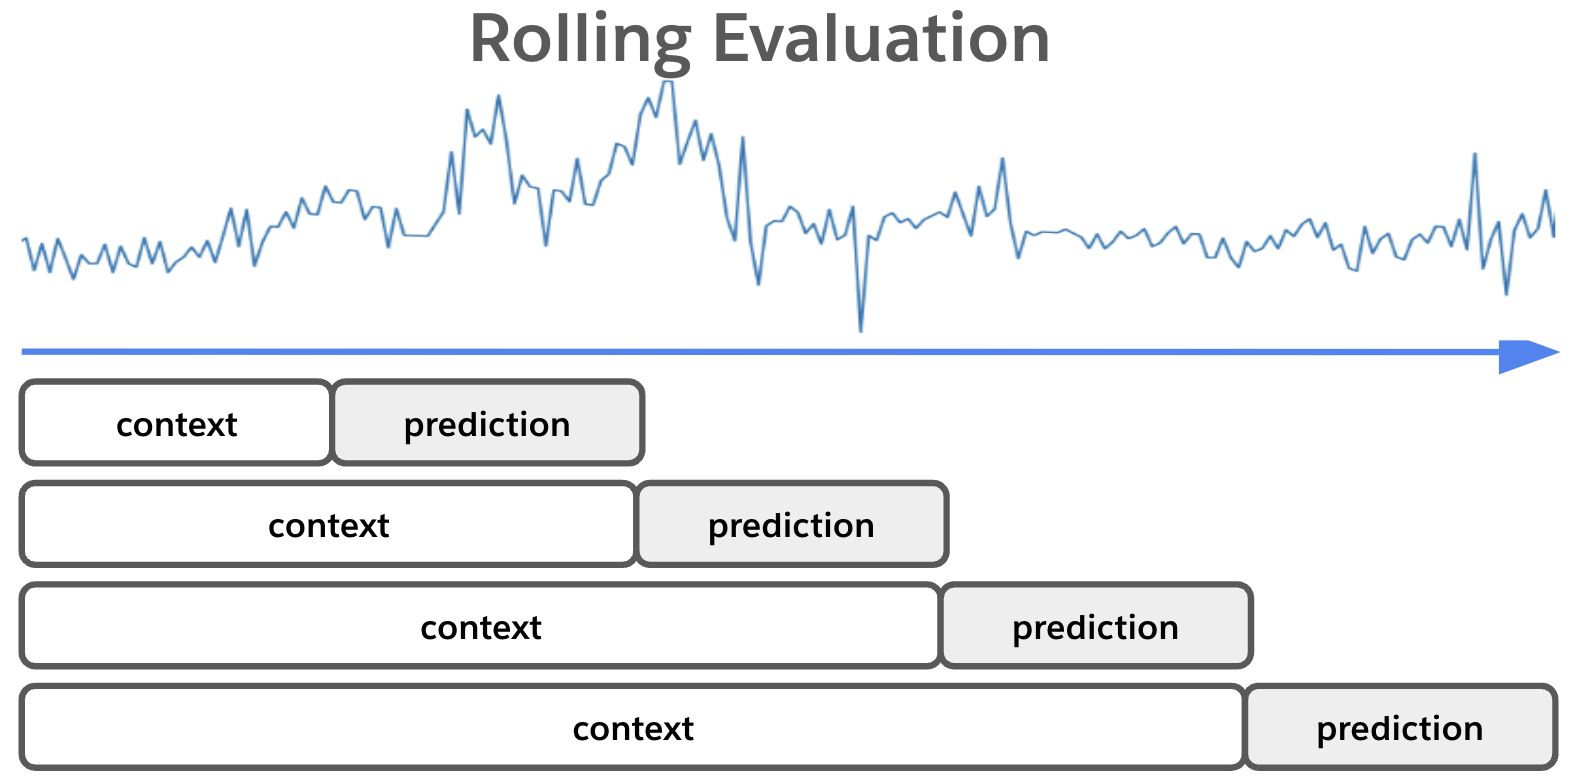

Cơ chế evaluation dùng trong validation step và testing step: Morai trượt trên target time series và thực hiện predict sau mỗi lần trượt, sử dụng `context_length` và `prediction_length` tương ứng.

Chọn `stride` = `prediction_length` cho non-overlapping và `stride`< `prediction_length` nếu muốn tạo các overlapping windows.

## **Model Fine-tuning**

### **Evaluation before fine-tuning**

In [ ]:
# Ham tinh khoang cach DTW
def dtw_distance_path(path1, path2):
    n, m = len(path1), len(path2)
    cost_matrix = [[float("inf")] * (m+1) for x in range(n+1)]
    cost_matrix[0][0] = 0
    path = []

    # Tinh toan khoang cach DTW
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(path1[i-1] - path2[j-1])
            cost_matrix[i][j] = cost + min(cost_matrix[i-1][j], cost_matrix[i][j-1], cost_matrix[i-1][j-1])

    # Tim duong di wrapping
    i, j = n, m
    while i > 0 or j > 0:
        path.append(cost_matrix[i][j])
        if i == 1 and j == 1:
            break
        elif i == 1:
            j -= 1
        elif j == 1:
            i -= 1
        else:
            if cost_matrix[i-1][j] == min(cost_matrix[i-1][j-1], cost_matrix[i-1][j], cost_matrix[i][j-1]):
                i -= 1
            elif cost_matrix[i][j-1] == min(cost_matrix[i-1][j-1], cost_matrix[i-1][j], cost_matrix[i][j-1]):
                j -= 1
            else:
                i -= 1
                j -= 1

    return cost_matrix[n][m]

In [ ]:
col = ['Unnamed: 0',
 'MSE[mean]',
 'MSE[0.5]',
 'MAE[0.5]',
 'MASE[0.5]',
 'MAPE[0.5]',
 'sMAPE[0.5]',
 'MSIS',
 'RMSE[mean]',
 'NRMSE[mean]',
 'ND[0.5]',
 'mean_weighted_sum_quantile_loss']

default_result_df = pd.DataFrame(columns=col)
default_result_df

,Unnamed: 0,MSE[mean],MSE[0.5],MAE[0.5],MASE[0.5],MAPE[0.5],sMAPE[0.5],MSIS,RMSE[mean],NRMSE[mean],ND[0.5],mean_weighted_sum_quantile_loss


In [ ]:
default_result_df

,Unnamed: 0,MSE[mean],MSE[0.5],MAE[0.5],MASE[0.5],MAPE[0.5],sMAPE[0.5],MSIS,RMSE[mean],NRMSE[mean],ND[0.5],mean_weighted_sum_quantile_loss


In [ ]:
cd uni2ts

/content/uni2ts


In [ ]:
import pickle
import numpy as np
import pandas as pd

In [ ]:
with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

In [ ]:
forecasts.shape

(100, 56)

In [ ]:
dtw_total_default = 0
dtw_list_default = []

In [ ]:
# 1
!python -m cli.eval run_name=base_eval_0206 model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
default_result_df = pd.concat([default_result_df, result], axis=0)

with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_default.append(mean_cost)
dtw_total_default = dtw_total_default + mean_cost

# 2
!python -m cli.eval run_name=base_eval_0206 model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
default_result_df = pd.concat([default_result_df, result], axis=0)


with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_default.append(mean_cost)
dtw_total_default = dtw_total_default + mean_cost


# 3
!python -m cli.eval run_name=base_eval_0206 model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
default_result_df = pd.concat([default_result_df, result], axis=0)



with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_default.append(mean_cost)
dtw_total_default = dtw_total_default + mean_cost


# 4
!python -m cli.eval run_name=base_eval_0206 model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
default_result_df = pd.concat([default_result_df, result], axis=0)


with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_default.append(mean_cost)
dtw_total_default = dtw_total_default + mean_cost


# 5
!python -m cli.eval run_name=base_eval_0206 model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
default_result_df = pd.concat([default_result_df, result], axis=0)


with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_default.append(mean_cost)
dtw_total_default = dtw_total_default + mean_cost

# 6
!python -m cli.eval run_name=base_eval_0206 model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
default_result_df = pd.concat([default_result_df, result], axis=0)


with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_default.append(mean_cost)
dtw_total_default = dtw_total_default + mean_cost

# 7
!python -m cli.eval run_name=base_eval_0206 model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
default_result_df = pd.concat([default_result_df, result], axis=0)


with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_default.append(mean_cost)
dtw_total_default = dtw_total_default + mean_cost

# 8
!python -m cli.eval run_name=base_eval_0206 model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
default_result_df = pd.concat([default_result_df, result], axis=0)


with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_default.append(mean_cost)
dtw_total_default = dtw_total_default + mean_cost

# 9
!python -m cli.eval run_name=base_eval_0206 model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
default_result_df = pd.concat([default_result_df, result], axis=0)

with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_default.append(mean_cost)
dtw_total_default = dtw_total_default + mean_cost


# 10
!python -m cli.eval run_name=base_eval_0206 model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
default_result_df = pd.concat([default_result_df, result], axis=0)


with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_default.append(mean_cost)
dtw_total_default = dtw_total_default + mean_cost

2024-06-26 07:32:53.532307: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 07:32:53.532360: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 07:32:53.534394: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-26 07:32:53.545252: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-26 07:32:54.700893: W tensorflow/compiler/tf2

In [ ]:
default_result_df

,Unnamed: 0,MSE[mean],MSE[0.5],MAE[0.5],MASE[0.5],MAPE[0.5],sMAPE[0.5],MSIS,RMSE[mean],NRMSE[mean],ND[0.5],mean_weighted_sum_quantile_loss
0,NaN,0.020921,0.021179,0.115537,3.364953,0.287362,0.286716,24.742499,0.144639,0.322474,2.060720,1.680753
0,NaN,0.020981,0.021099,0.116178,3.383956,0.289058,0.287463,26.824503,0.144849,0.322942,2.072148,1.687088
0,NaN,0.020713,0.020893,0.115605,3.367378,0.287033,0.286180,26.559345,0.143920,0.320871,2.061927,1.674818
0,NaN,0.020985,0.021560,0.116812,3.405531,0.290074,0.290219,22.484250,0.144862,0.322970,2.083471,1.690945
0,NaN,0.020795,0.021107,0.116144,3.385260,0.288905,0.287160,25.930174,0.144205,0.321506,2.071554,1.684040
0,NaN,0.021290,0.021671,0.117067,3.410881,0.290210,0.291697,28.810753,0.145912,0.325311,2.088008,1.696724
0,NaN,0.020805,0.020968,0.115512,3.362135,0.287673,0.286409,25.240388,0.144239,0.321583,2.060269,1.677389
0,NaN,0.021058,0.020996,0.115746,3.372690,0.288150,0.286677,26.709871,0.145115,0.323535,2.064443,1.679989
0,NaN,0.020863,0.021028,0.116339,3.389958,0.288775,0.288232,26.857155,0.144439,0.322028,2.075033,1.687190
0,NaN,0.021268,0.021357,0.116849,3.406929,0.290973,0.289336,25.658455,0.145836,0.325142,2.084132,1.692087


Kết quả trung bình:

In [ ]:
default_result_df.mean()

Unnamed: 0                               NaN
MSE[mean]                           0.020968
MSE[0.5]                            0.021186
MAE[0.5]                            0.116179
MASE[0.5]                           3.384967
MAPE[0.5]                           0.288821
sMAPE[0.5]                          0.288009
MSIS                               25.981739
RMSE[mean]                          0.144802
NRMSE[mean]                         0.322836
ND[0.5]                             2.072171
mean_weighted_sum_quantile_loss     1.685102
dtype: float64

In [ ]:
dtw_list_default

[4.866815758496523,
 4.802697679102421,
 4.787906829863787,
 4.782797605246305,
 4.677103267759085,
 4.7802910389006135,
 4.752265280336141,
 4.772770803123713,
 4.913759489804506,
 4.783844255059957]

In [ ]:
mean_df = dtw_total_default/10
mean_df

4.792025200769305

### **Fine-tuning**

In [ ]:
!python -m cli.train -cp conf/finetune run_name=base_fine_tune_2206 model=moirai_1.0_R_base data=vn30 val_data=vn30_multi

[2024-06-23 06:53:05,871][numexpr.utils][INFO] - NumExpr defaulting to 2 threads.
Số trainable para còn lại: 5214464
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
[2024-06-23 06:53:09,540][datasets][INFO] - PyTorch version 2.3.0+cu121 available.
[2024-06-23 06:53:09,541][datasets][INFO] - TensorFlow version 2.15.0 available.
[2024-06-23 06:53:09,542][datasets][INFO] - JAX version 0.4.26 available.
/content/uni2ts/src/uni2ts/common/env.py:43: UserWarning: Failed to load .env file.
  warnings.warn("Failed to load .env file.")
Seed set to 9
2024-06-23 06:53:10.445056: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 06:53:10.445116: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT wh

### **Evaluation after fine-tuning**

In [ ]:
dtw_total_finetune = 0
dtw_list_finetune = []

In [ ]:
col = ['Unnamed: 0',
 'MSE[mean]',
 'MSE[0.5]',
 'MAE[0.5]',
 'MASE[0.5]',
 'MAPE[0.5]',
 'sMAPE[0.5]',
 'MSIS',
 'RMSE[mean]',
 'NRMSE[mean]',
 'ND[0.5]',
 'mean_weighted_sum_quantile_loss']

finetuned_result_df = pd.DataFrame(columns=col)
finetuned_result_df

,Unnamed: 0,MSE[mean],MSE[0.5],MAE[0.5],MASE[0.5],MAPE[0.5],sMAPE[0.5],MSIS,RMSE[mean],NRMSE[mean],ND[0.5],mean_weighted_sum_quantile_loss


In [ ]:
# 1
!python -m cli.eval run_name=base_eval_0206_ model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
finetuned_result_df = pd.concat([finetuned_result_df, result], axis=0)

with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_finetune.append(mean_cost)
dtw_total_finetune = dtw_total_finetune + mean_cost


# 2
!python -m cli.eval run_name=base_eval_0206_ model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
finetuned_result_df = pd.concat([finetuned_result_df, result], axis=0)

with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_finetune.append(mean_cost)
dtw_total_finetune = dtw_total_finetune + mean_cost

# 3
!python -m cli.eval run_name=base_eval_0206_ model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
finetuned_result_df = pd.concat([finetuned_result_df, result], axis=0)

with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_finetune.append(mean_cost)
dtw_total_finetune = dtw_total_finetune + mean_cost


# 4
!python -m cli.eval run_name=base_eval_0206_ model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
finetuned_result_df = pd.concat([finetuned_result_df, result], axis=0)

with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_finetune.append(mean_cost)
dtw_total_finetune = dtw_total_finetune + mean_cost


# 5
!python -m cli.eval run_name=base_eval_0206_ model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
finetuned_result_df = pd.concat([finetuned_result_df, result], axis=0)

with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_finetune.append(mean_cost)
dtw_total_finetune = dtw_total_finetune + mean_cost

# 6
!python -m cli.eval run_name=base_eval_0206_ model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
finetuned_result_df = pd.concat([finetuned_result_df, result], axis=0)

with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_finetune.append(mean_cost)
dtw_total_finetune = dtw_total_finetune + mean_cost


# 7
!python -m cli.eval run_name=base_eval_0206_ model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
finetuned_result_df = pd.concat([finetuned_result_df, result], axis=0)

with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_finetune.append(mean_cost)
dtw_total_finetune = dtw_total_finetune + mean_cost


# 8
!python -m cli.eval run_name=base_eval_0206_ model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
finetuned_result_df = pd.concat([finetuned_result_df, result], axis=0)

with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_finetune.append(mean_cost)
dtw_total_finetune = dtw_total_finetune + mean_cost

# 9
!python -m cli.eval run_name=base_eval_0206_ model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
finetuned_result_df = pd.concat([finetuned_result_df, result], axis=0)

with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_finetune.append(mean_cost)
dtw_total_finetune = dtw_total_finetune + mean_cost

# 10
!python -m cli.eval run_name=base_eval_0206_ model=moirai_1.0_R_base model.patch_size=32 model.context_length=200 data=vn30_test

result = pd.read_csv('ketqua.csv')
finetuned_result_df = pd.concat([finetuned_result_df, result], axis=0)


with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(7):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(7):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(56, )


total_cost = 0
for i in range(len(forecasts)):
  cost = dtw_distance_path(forecasts[i], labels)
  total_cost = total_cost + cost

mean_cost = total_cost/(forecasts.shape[0])
dtw_list_finetune.append(mean_cost)
dtw_total_finetune = dtw_total_finetune + mean_cost

2024-06-26 07:44:55.281845: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 07:44:55.281893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 07:44:55.283248: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-26 07:44:55.290888: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-26 07:44:56.416896: W tensorflow/compiler/tf2

In [ ]:
finetuned_result_df

,Unnamed: 0,MSE[mean],MSE[0.5],MAE[0.5],MASE[0.5],MAPE[0.5],sMAPE[0.5],MSIS,RMSE[mean],NRMSE[mean],ND[0.5],mean_weighted_sum_quantile_loss
0,NaN,0.015181,0.016000,0.099127,2.871048,0.270077,0.236420,21.103856,0.123211,0.274699,1.768031,1.401927
0,NaN,0.015532,0.017173,0.102289,2.973266,0.284163,0.242405,20.731994,0.124628,0.277858,1.824439,1.438157
0,NaN,0.017567,0.018544,0.107420,3.132002,0.289467,0.257773,23.543280,0.132542,0.295503,1.915943,1.547904
0,NaN,0.015491,0.016497,0.101892,2.957871,0.276556,0.241116,20.680724,0.124462,0.277488,1.817345,1.441947
0,NaN,0.018124,0.019394,0.110735,3.237002,0.299512,0.262671,28.185042,0.134627,0.300151,1.975073,1.602908
0,NaN,0.018670,0.019788,0.111266,3.257552,0.303811,0.262396,21.610738,0.136637,0.304634,1.984537,1.581210
0,NaN,0.018277,0.019031,0.108840,3.175327,0.291206,0.262709,24.515899,0.135193,0.301414,1.941273,1.580465
0,NaN,0.017300,0.018353,0.106385,3.103731,0.289791,0.253508,23.494620,0.131530,0.293246,1.897484,1.531484
0,NaN,0.016572,0.017671,0.104177,3.032423,0.287241,0.247101,21.942847,0.128732,0.287010,1.858113,1.468994
0,NaN,0.014594,0.015001,0.096745,2.797953,0.270285,0.227056,21.700590,0.120805,0.269335,1.725554,1.361343


Trung bình kết quả 10 lần chạy:

In [ ]:
finetuned_result_df.mean()

Unnamed: 0                               NaN
MSE[mean]                           0.016731
MSE[0.5]                            0.017745
MAE[0.5]                            0.104888
MASE[0.5]                           3.053817
MAPE[0.5]                           0.286211
sMAPE[0.5]                          0.249315
MSIS                               22.750959
RMSE[mean]                          0.129237
NRMSE[mean]                         0.288134
ND[0.5]                             1.870779
mean_weighted_sum_quantile_loss     1.495634
dtype: float64

In [ ]:
default_result_df.mean()

Unnamed: 0                               NaN
MSE[mean]                           0.020968
MSE[0.5]                            0.021186
MAE[0.5]                            0.116179
MASE[0.5]                           3.384967
MAPE[0.5]                           0.288821
sMAPE[0.5]                          0.288009
MSIS                               25.981739
RMSE[mean]                          0.144802
NRMSE[mean]                         0.322836
ND[0.5]                             2.072171
mean_weighted_sum_quantile_loss     1.685102
dtype: float64

In [ ]:
dtw_list_finetune

[4.7967825090885166,
 4.708098100870847,
 4.3609654220938685,
 4.428338570296765,
 4.9007250764966015,
 4.922391594797372,
 4.7773128975927825,
 4.599072882831097,
 4.8816229407489296,
 4.518893584012985]

In [ ]:
mean_df

4.792025200769305

In [ ]:
mean_ft = dtw_total_finetune/10
mean_ft

4.689420357882976

## **Visualization**

In [ ]:
# Read data into pandas DataFrame
df = pd.read_csv('dataset/VN30/vn30test_scaled.csv', index_col=0, parse_dates=True)
df

,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE,VN30
2024-01-02,1.283865,1.953379,-1.537589,0.538611,1.832998,0.110536,-0.043038,1.410186,0.341129,0.407443,...,-0.193457,0.316789,1.450390,-1.504315,-1.705223,-0.648125,-0.962019,0.358210,-1.791685,-0.090518
2024-01-03,1.398971,2.109972,-1.502233,0.614056,1.852370,0.139751,0.032910,1.436732,0.379725,0.401321,...,-0.148153,0.345745,1.539354,-1.472195,-1.697660,-0.596750,-0.880815,0.403151,-1.744187,-0.036637
2024-01-04,1.461756,2.080611,-1.449199,0.802668,1.895957,0.190878,0.009541,1.542920,0.374900,0.419687,...,-0.103773,0.432615,1.663903,-1.468180,-1.697660,-0.589411,-0.880815,0.446220,-1.696690,0.010351
2024-01-05,1.493149,2.246991,-1.466877,0.878112,1.905643,0.227397,0.056279,1.569467,0.379725,0.425809,...,-0.094528,0.451919,1.690592,-1.496285,-1.700181,-0.604089,-0.904353,0.420004,-1.712522,0.029807
2024-01-06,1.472221,2.618900,-1.466877,0.981849,1.900800,0.198182,0.021226,1.582740,0.385755,0.450298,...,-0.014089,0.442267,1.743970,-1.476210,-1.687575,-0.677482,-0.973788,0.429367,-1.601695,0.039515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-28,1.974503,2.951660,-1.396165,1.500342,3.508682,0.081321,1.306501,2.312779,0.642658,1.025769,...,1.222993,0.451919,2.082033,-1.733171,-1.601859,0.085798,-1.071468,0.403151,-2.060836,0.503646
2024-03-29,1.964039,3.049531,-1.369648,1.509961,3.683030,0.103232,1.335712,2.365873,0.752415,1.086990,...,1.241485,0.442267,2.117618,-1.725141,-1.586732,0.107816,-1.012625,0.393788,-2.029171,0.555284
2024-03-30,2.079146,3.245273,-1.325454,1.670281,3.745990,0.132448,1.312226,2.551701,0.797041,1.135966,...,1.402361,0.519484,2.259960,-1.725141,-1.566563,0.122494,-0.989087,0.455582,-1.934177,0.629927
2024-03-31,2.079146,3.196337,-1.316615,1.651420,3.702402,0.117840,1.405817,2.578248,0.797041,1.148210,...,1.389417,0.529136,2.188789,-1.676961,-1.561521,0.115155,-1.012625,0.455582,-1.791685,0.637595


In [ ]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from huggingface_hub import hf_hub_download

from uni2ts.eval_util.plot import plot_single
from uni2ts.model.moirai import MoiraiForecast

PDT = 7  # prediction length: any positive integer
CTX = 200 # context length: any positive integer
PSZ = 32  # patch size: choose from {"auto", 8, 16, 32, 64, 128}
BSZ = 8  # batch size: any positive integer
TEST = 7 # test set length: any positive integer

In [ ]:
col_name = list(df.columns)
col_name.remove('VN30') # Chọn A là target
ds = PandasDataset(df, target='VN30', past_feat_dynamic_real=col_name)
ds

PandasDataset<size=1, freq=D, num_feat_dynamic_real=0, num_past_feat_dynamic_real=30, num_feat_static_real=0, num_feat_static_cat=0, static_cardinalities=[]>

In [ ]:
# Split into train/test set
train, test_template = split(
    ds, offset=-TEST
)  # assign last TEST time steps as test set

# Construct rolling window evaluation
test_data = test_template.generate_instances(
    prediction_length=PDT,  # number of time steps for each prediction
    windows=TEST // PDT,  # number of windows in rolling window evaluation
    distance=PDT,  # number of time steps between each window - distance=PDT for non-overlapping windows
)

Default model:

In [ ]:
# Prepare pre-trained model by downloading model weights from huggingface hub
from uni2ts.model.moirai import MoiraiForecast, MoiraiModule

default_model = MoiraiForecast(
    module=MoiraiModule.from_pretrained(f"Salesforce/moirai-1.0-R-base"),
    prediction_length=PDT,
    context_length=CTX,
    patch_size=PSZ,
    num_samples=100,
    target_dim=1,
    feat_dynamic_real_dim=ds.num_feat_dynamic_real,
    past_feat_dynamic_real_dim=ds.num_past_feat_dynamic_real,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/683 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/365M [00:00<?, ?B/s]

Fine-tuned model:

In [ ]:
finetune_model = MoiraiForecast.load_from_checkpoint(
    checkpoint_path='./outputs/finetune/moirai_1.0_R_base/vn30/base_fine_tune_2206/checkpoints/epoch=2-step=300-v1.ckpt',
    prediction_length=PDT,
    context_length=CTX,
    patch_size=PSZ,
    num_samples=100,
    target_dim=1,
    feat_dynamic_real_dim=ds.num_feat_dynamic_real,
    past_feat_dynamic_real_dim=ds.num_past_feat_dynamic_real,
)

In [ ]:
# Default model predict
default_predictor = default_model.create_predictor(batch_size=BSZ)
default_forecasts = default_predictor.predict(test_data.input)

default_input_it = iter(test_data.input)
default_label_it = iter(test_data.label)
default_forecast_it = iter(default_forecasts)

default_inp = next(default_input_it)
default_label = next(default_label_it)
default_forecast = next(default_forecast_it)



# Fine-tuned mode predict
finetune_predictor = finetune_model.create_predictor(batch_size=BSZ)
finetune_forecasts = finetune_predictor.predict(test_data.input)

finetune_input_it = iter(test_data.input)
finetune_label_it = iter(test_data.label)
finetune_forecast_it = iter(finetune_forecasts)

finetune_inp = next(finetune_input_it)
finetune_label = next(finetune_label_it)
finetune_forecast = next(finetune_forecast_it)

In [ ]:
from typing import Iterator, Optional

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gluonts import maybe
from gluonts.model import Forecast


def myplot_single(
    inp: dict,
    label: dict,
    forecast: Forecast,
    context_length: int,
    intervals: tuple[float, ...] = (0.5, 0.9),
    ax: Optional[plt.axis] = None,
    dim: Optional[int] = None,
    name: Optional[str] = None,
    show_label: bool = False,
):
    ax = maybe.unwrap_or_else(ax, plt.gca)

    target = np.concatenate([inp["target"], label["target"]], axis=-1)
    start = inp["start"]
    if dim is not None:
        target = target
        forecast = forecast.copy_dim(dim)

    index = pd.period_range(start, periods=len(target), freq=start.freq)
    ax.plot(
        index.to_timestamp()[-context_length - forecast.prediction_length :],
        target[-context_length - forecast.prediction_length :],
        label="target",
        color="black",
    )
    forecast.plot(
        intervals=intervals,
        ax=ax,
        color="blue",
        name=name,
        show_label=show_label,
    )
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.legend(loc="lower left")
    ax.set_title('VN30-Index Forecasting with Finetuned MOIRAI-Base Model (prediction length = 7)')
    ax.set_xlabel('Time')
    ax.set_ylabel('VN30-Index Values')

Default model prediction:

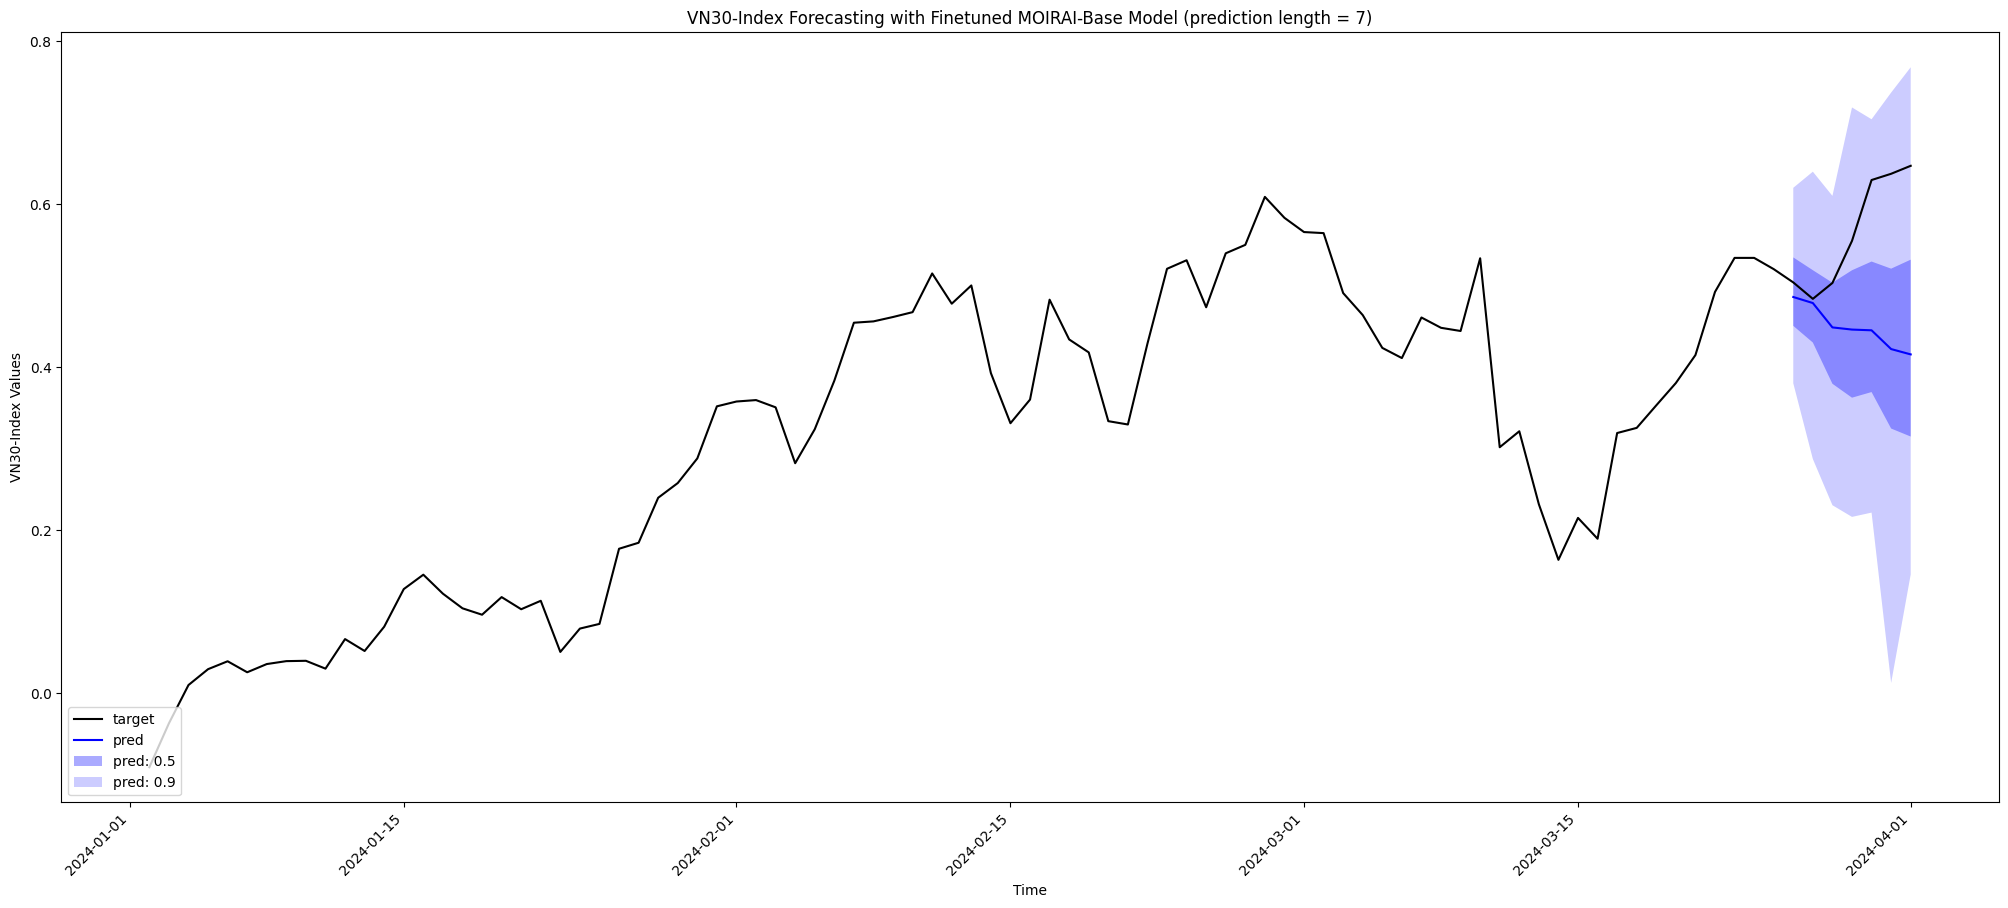

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 10))
myplot_single(
        default_inp,
        default_label,
        default_forecast,
        context_length=CTX,
        intervals=(0.5, 0.9),
        dim=1,
        ax=axes,
        name="pred",
        show_label=True,)

Fine-tuned model prediction:

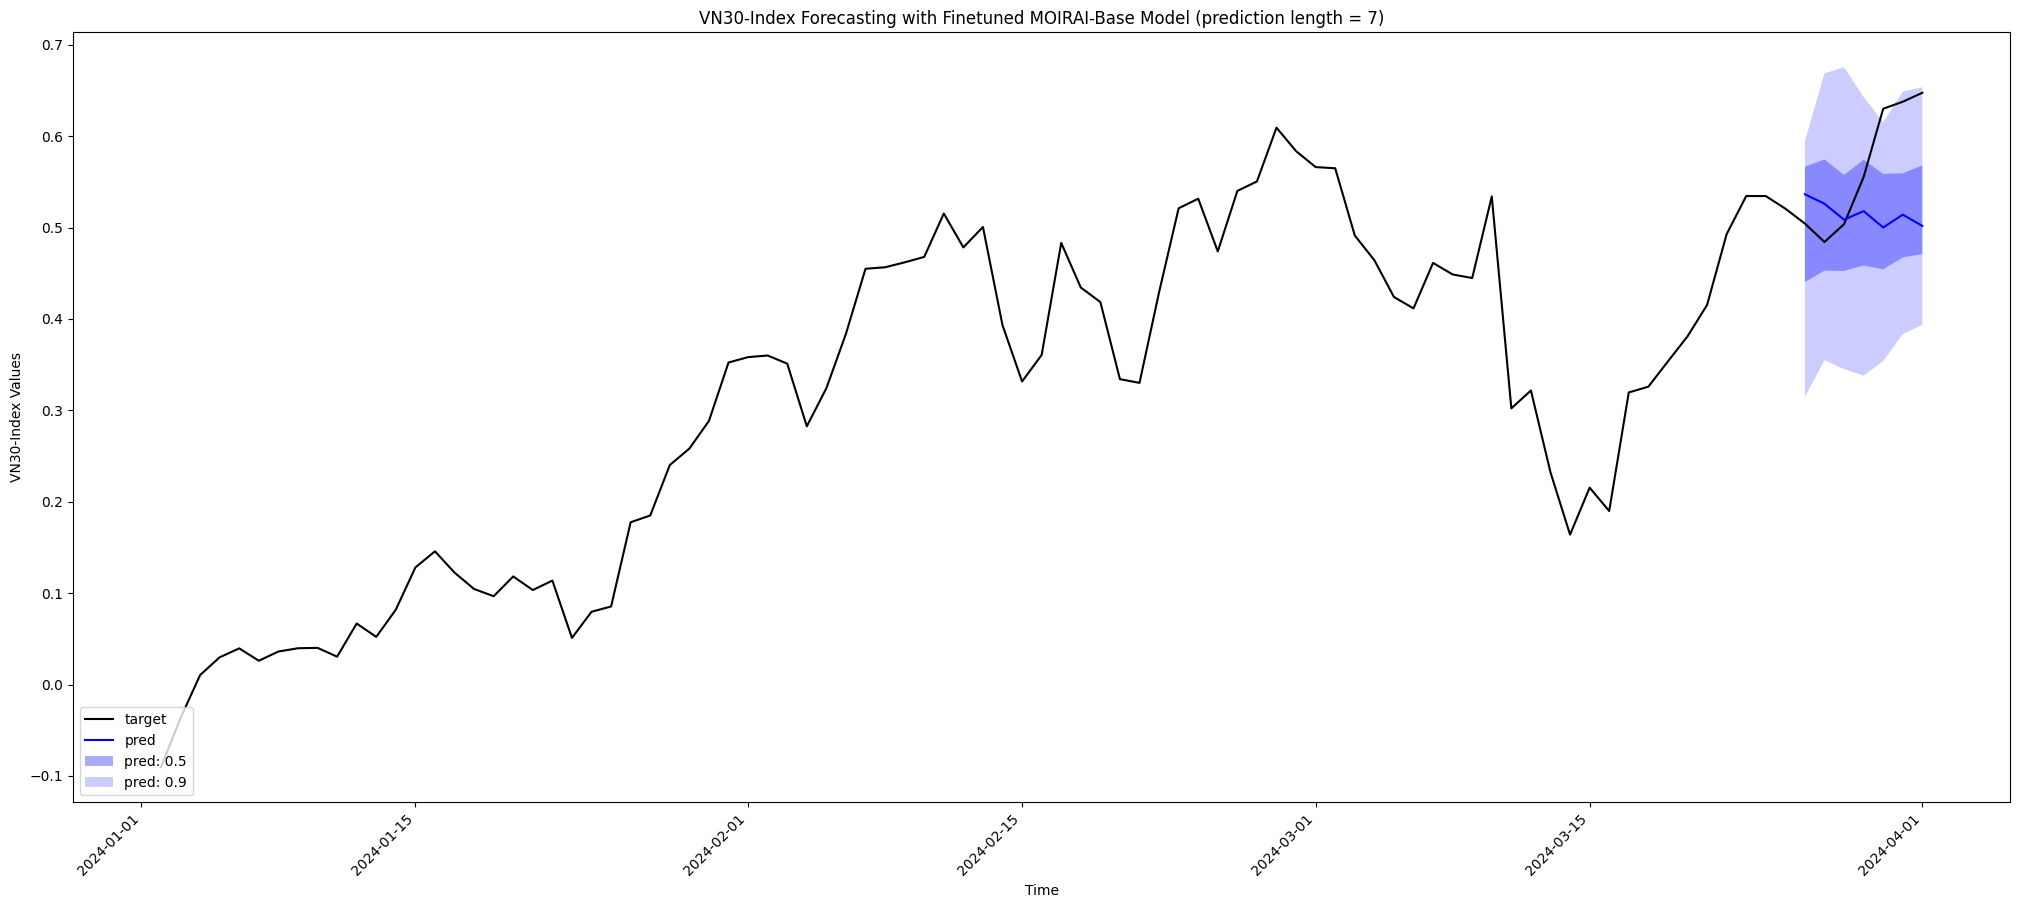

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 10))
myplot_single(
        finetune_inp,
        finetune_label,
        finetune_forecast,
        context_length=CTX,
        intervals=(0.5, 0.9),
        dim=1,
        ax=axes,
        name="pred",
        show_label=True,)

# **PART 2 - Calculate the distance to consider an abnormal point**

Moirai là một mô hình dự đoán xác suất, nó lấy mẫu ngẫu nhiên ra `number_samples` có thể xảy ra cho mỗi prediction time step. Từ đó, tính MAE của mỗi prediction time step so với ground truth time step, xác định được khoảng cách của một điểm dữ liệu thực tế so với `number_samples` xác suất xảy ra của nó => Từ đó cho ra một độ đo làm căn cứ để có thể xác định 1 điểm dữ liệu nào đó trong thực tế là bất thường.

In [ ]:
!python -m uni2ts.data.builder.simple VN30_test dataset/VN30/vn30test.csv --dataset_type wide_multivariate

/content/uni2ts/src/uni2ts/common/env.py:43: UserWarning: Failed to load .env file.
  warnings.warn("Failed to load .env file.")
Generating train split: 1 examples [00:00, 52.32 examples/s]
Saving the dataset (1/1 shards): 100% 1/1 [00:00<00:00, 123.31 examples/s]


In [ ]:
test_df = pd.read_csv('dataset/VN30/vn30test.csv', index_col=0, parse_dates=True)
test = test_df.tail(49)

In [ ]:
day_list = test.tail(49).index
day_list

DatetimeIndex(['2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16',
               '2024-02-17', '2024-02-18', '2024-02-19', '2024-02-20',
               '2024-02-21', '2024-02-22', '2024-02-23', '2024-02-24',
               '2024-02-25', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01', '2024-03-02', '2024-03-03',
               '2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07',
               '2024-03-08', '2024-03-09', '2024-03-10', '2024-03-11',
               '2024-03-12', '2024-03-13', '2024-03-14', '2024-03-15',
               '2024-03-16', '2024-03-17', '2024-03-18', '2024-03-19',
               '2024-03-20', '2024-03-21', '2024-03-22', '2024-03-23',
               '2024-03-24', '2024-03-25', '2024-03-26', '2024-03-27',
               '2024-03-28', '2024-03-29', '2024-03-30', '2024-03-31',
               '2024-04-01'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
test

,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE,VN30
2024-02-13,27.50,53.30,44.90,35.800,111.300,80.4,29.100,23.15,28.18,36.50,...,41.31,19.25,95.8,43.20,45.60,103.9,71.08,18.47,26.00,1276.56
2024-02-14,27.05,51.10,44.45,34.500,110.000,79.5,29.000,23.00,27.55,36.45,...,39.76,18.60,95.1,42.55,44.80,103.7,69.11,18.04,25.40,1250.20
2024-02-15,26.75,50.50,43.35,34.150,110.000,77.8,29.550,23.10,27.18,36.45,...,39.18,18.50,94.1,42.55,44.35,103.0,69.40,17.61,24.50,1235.12
2024-02-16,26.75,52.00,43.40,34.500,111.900,77.9,31.600,22.95,27.45,36.60,...,39.96,18.50,94.4,42.70,44.15,102.5,69.11,17.61,25.20,1242.23
2024-02-17,27.65,52.60,44.00,35.150,117.000,79.0,32.299,23.10,28.00,37.60,...,40.73,19.00,96.0,42.95,45.00,102.2,69.90,18.09,25.90,1272.28
2024-02-18,27.25,51.70,43.65,34.450,117.000,81.0,32.800,22.95,27.59,37.50,...,40.15,18.75,95.0,42.90,45.95,102.0,69.60,17.85,25.90,1260.32
2024-02-19,27.35,52.20,43.10,34.750,116.000,82.3,34.600,23.00,27.36,37.20,...,40.15,18.80,94.0,42.40,44.40,102.7,68.80,17.71,25.75,1256.42
2024-02-20,26.90,52.00,42.00,33.300,113.000,80.2,32.549,22.30,26.91,37.20,...,38.89,18.30,93.0,42.10,46.10,101.8,67.90,17.28,27.55,1235.74
2024-02-21,26.85,51.60,42.00,33.300,112.000,79.7,32.549,22.35,27.09,36.60,...,39.08,18.20,92.5,42.90,47.00,101.0,67.80,17.23,26.75,1234.74
2024-02-22,27.50,53.00,42.25,34.350,114.500,81.0,32.800,22.60,27.27,36.55,...,41.02,18.60,93.2,42.50,46.50,101.2,68.00,17.71,26.35,1259.06


## **MAE Distance**

In [ ]:
# 1
!python -m cli.eval run_name=base_eval_2306 model=moirai_1.0_R_base model.patch_size=32 model.context_length=500 data=vn30_test


with open("forecast.pkl", "rb") as f:
    forecast = pickle.load(f)

temp1 = None
forecasts = forecast[0]
for i in range(6):
  temp1 = forecast[i+1]
  forecasts = np.hstack((forecasts, temp1))

with open("label.pkl", "rb") as f:
    label = pickle.load(f)

temp2 = None
labels = label[0]
for i in range(6):
  temp2 = label[i+1]
  labels = np.hstack((labels, temp2))

labels = labels.reshape(49, )


2024-08-14 09:45:34.040244: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-14 09:45:34.364347: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-14 09:45:34.457020: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-14 09:45:36.935316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[2024-08-14 09:45:38,534][datasets][INFO] - PyTorch version 2.3.1+cu121 available.
[2024-08-14 09:45:38,535][datasets][INFO] - TensorFlow version 2.17.0 available.
[2024-08-14 09:45:38,536][datasets][INFO] - JAX version 0.4.26 available.
/co

In [ ]:
forecasts.shape

(100, 49)

In [ ]:
forecasts

array([[1283.6754, 1243.0538, 1288.5568, ..., 1271.3948, 1312.8444,
        1292.2446],
       [1274.915 , 1289.709 , 1312.3995, ..., 1292.3518, 1264.0784,
        1334.758 ],
       [1281.9547, 1239.9637, 1269.3182, ..., 1286.2058, 1308.7069,
        1285.0963],
       ...,
       [1271.6185, 1259.8741, 1235.3367, ..., 1372.913 , 1303.5776,
        1329.4886],
       [1278.3921, 1267.6025, 1218.1919, ..., 1325.9626, 1276.2588,
        1283.3448],
       [1287.722 , 1259.9521, 1295.2496, ..., 1276.8265, 1274.0236,
        1283.8926]], dtype=float32)

MAE per day:
 [15.041395  28.85355   45.04049   36.22416   20.258524  28.205683
 31.625435  21.742552  24.286049  15.91523   29.218096  38.297245
 28.679493  35.89246   23.676716  36.814526  31.71168   30.713886
 30.765303  23.471655  24.953062  21.213003  23.575647  15.280201
 15.4271555 19.373997  28.354023  42.391064  33.69325   59.642086
 73.77856   65.02807   60.95429   38.329235  33.4129    22.676886
 16.637608  16.474072  32.856728  43.88795   37.831398  31.782076
 20.73224   25.289621  22.915922  22.879044  27.762886  29.512001
 33.416595 ]


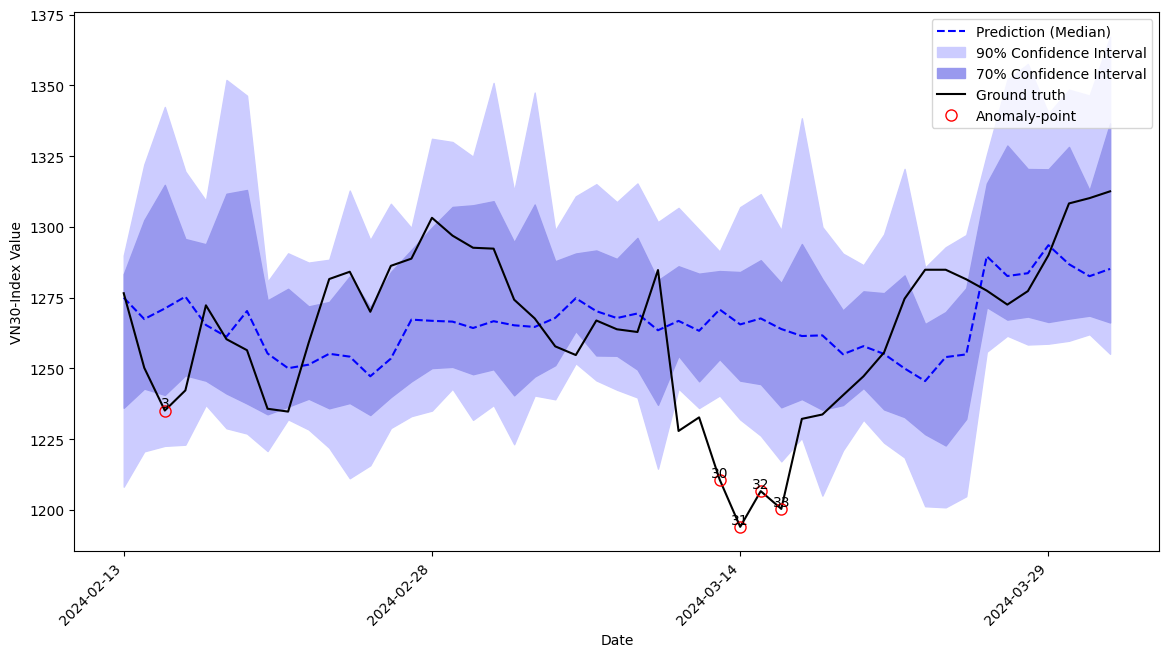

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_forecast(forecast, labels, change_num, day_list):

    # Tính đường median
    median = np.median(forecast, axis=0)

    # Tính các khoảng tin cậy
    ci90_lower = np.percentile(forecast, 5, axis=0)
    ci90_upper = np.percentile(forecast, 95, axis=0)
    ci70_lower = np.percentile(forecast, 15, axis=0)
    ci70_upper = np.percentile(forecast, 85, axis=0)

    # Tính MAE cho từng ngày
    mae_per_day = np.mean(np.abs(labels - forecast), axis=0)
    print("MAE per day:\n", mae_per_day)

    # Lấy ra top 5 ngày có MAE lớn nhất
    top_5_days = np.argsort(mae_per_day)[-change_num:][::-1]

    # Vẽ biểu đồ
    days = np.arange(1, forecast.shape[1] + 1)
    plt.figure(figsize=(14, 7))

    plt.plot(days, median, label='Prediction (Median)', linestyle='--', color='blue')

    plt.fill_between(days, ci90_lower, ci90_upper, color='#ccccff', label='90% Confidence Interval')
    plt.fill_between(days, ci70_lower, ci70_upper, color='#9999ee', label='70% Confidence Interval')

    # Vẽ đường labels
    plt.plot(days, labels, label='Ground truth', color='black')

    # Đánh dấu top 5 ngày có MAE lớn nhất trên đường labels với style vòng tròn có viền màu đỏ, không cần fill màu
    plt.plot(top_5_days + 1, labels[top_5_days], 'o', markerfacecolor='none', markeredgecolor='red', markersize=8, label='Anomaly-point')

    # Hiển thị nhãn cho top 5 ngày trên đường labels
    for day in top_5_days:
        plt.text(day + 1, labels[day], f'{day + 1}', fontsize=10, ha='center', va='bottom')

    # Định dạng lại các giá trị ngày tháng năm mà không hiển thị thời gian
    formatted_days = [day.strftime('%Y-%m-%d') for day in day_list]

    # Thiết lập nhãn cho trục hoành với độ chia 15 ngày
    tick_indices = np.arange(0, len(formatted_days), 15)
    plt.xticks(ticks=tick_indices + 1, labels=np.array(formatted_days)[tick_indices], rotation=45, ha='right')

    plt.xlabel('Date')
    plt.ylabel('VN30-Index Value')

    plt.legend()
    # plt.ylim(1150, 1400)
    plt.show()
    return mae_per_day

# Giả sử forecasts và labels đã được định nghĩa trước đó
mae_forecasts = forecasts
mae_labels = labels
# day_list = np.array([...])  # Mảng numpy chứa giá trị ngày dưới dạng datetime

mae_per_day = plot_forecast(mae_forecasts, mae_labels, change_num=5, day_list=day_list)


MAE per day:
 [15.041395  28.85355   45.04049   36.22416   20.258524  28.205683
 31.625435  21.742552  24.286049  15.91523   29.218096  38.297245
 28.679493  35.89246   23.676716  36.814526  31.71168   30.713886
 30.765303  23.471655  24.953062  21.213003  23.575647  15.280201
 15.4271555 19.373997  28.354023  42.391064  33.69325   59.642086
 73.77856   65.02807   60.95429   38.329235  33.4129    22.676886
 16.637608  16.474072  32.856728  43.88795   37.831398  31.782076
 20.73224   25.289621  22.915922  22.879044  27.762886  29.512001
 33.416595 ]


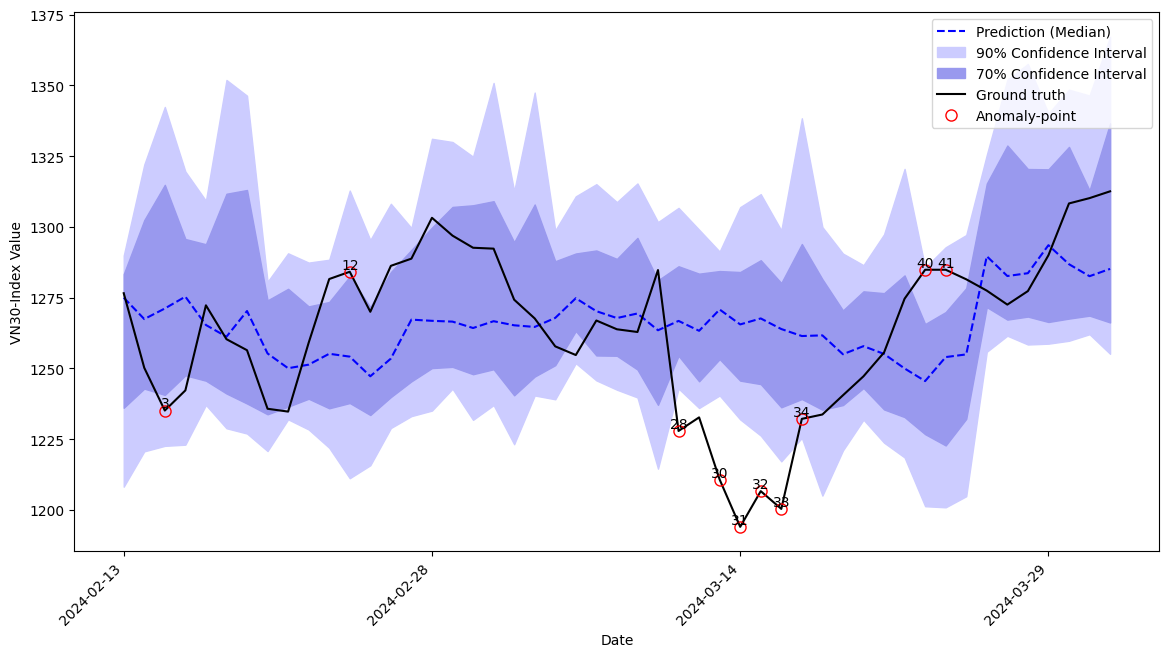

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_forecast(forecast, labels, change_num, day_list):

    # Tính đường median
    median = np.median(forecast, axis=0)

    # Tính các khoảng tin cậy
    ci90_lower = np.percentile(forecast, 5, axis=0)
    ci90_upper = np.percentile(forecast, 95, axis=0)
    ci70_lower = np.percentile(forecast, 15, axis=0)
    ci70_upper = np.percentile(forecast, 85, axis=0)

    # Tính MAE cho từng ngày
    mae_per_day = np.mean(np.abs(labels - forecast), axis=0)
    print("MAE per day:\n", mae_per_day)

    # Lấy ra top 5 ngày có MAE lớn nhất
    top_5_days = np.argsort(mae_per_day)[-change_num:][::-1]

    # Vẽ biểu đồ
    days = np.arange(1, forecast.shape[1] + 1)
    plt.figure(figsize=(14, 7))

    plt.plot(days, median, label='Prediction (Median)', linestyle='--', color='blue')

    plt.fill_between(days, ci90_lower, ci90_upper, color='#ccccff', label='90% Confidence Interval')
    plt.fill_between(days, ci70_lower, ci70_upper, color='#9999ee', label='70% Confidence Interval')

    # Vẽ đường labels
    plt.plot(days, labels, label='Ground truth', color='black')

    # Đánh dấu top 5 ngày có MAE lớn nhất trên đường labels với style vòng tròn có viền màu đỏ, không cần fill màu
    plt.plot(top_5_days + 1, labels[top_5_days], 'o', markerfacecolor='none', markeredgecolor='red', markersize=8, label='Anomaly-point')

    # Hiển thị nhãn cho top 5 ngày trên đường labels
    for day in top_5_days:
        plt.text(day + 1, labels[day], f'{day + 1}', fontsize=10, ha='center', va='bottom')

    # Định dạng lại các giá trị ngày tháng năm mà không hiển thị thời gian
    formatted_days = [day.strftime('%Y-%m-%d') for day in day_list]

    # Thiết lập nhãn cho trục hoành với độ chia 15 ngày
    tick_indices = np.arange(0, len(formatted_days), 15)
    plt.xticks(ticks=tick_indices + 1, labels=np.array(formatted_days)[tick_indices], rotation=45, ha='right')

    plt.xlabel('Date')
    plt.ylabel('VN30-Index Value')

    plt.legend()
    # plt.ylim(1150, 1400)
    plt.show()
    return mae_per_day

# Giả sử forecasts và labels đã được định nghĩa trước đó
mae_forecasts = forecasts
mae_labels = labels

mae_per_day = plot_forecast(mae_forecasts, mae_labels, change_num=10, day_list=day_list)


## zip

In [ ]:
cd uni2ts

/content/uni2ts


In [ ]:
cd ..

/content


In [ ]:
import shutil
import os

# Thư mục bạn đang làm việc trên Colab
working_directory = "/content"

# Tên thư mục bạn muốn tải xuống
folder_name = "uni2ts"

# Nén thư mục thành file zip
shutil.make_archive(folder_name, 'zip', working_directory, folder_name)

# Di chuyển file zip vào thư mục /content để tải xuống dễ dàng hơn
os.rename(f"{folder_name}.zip", f"/content/{folder_name}_new.zip")